# University of Aberdeen

## Applied AI (CS5079)

### Tutorial (Day 2) - Predicting Bike Demand

---

The practical is based on Chapters 6 of Practical Machine Learning with Python (D. Sarkar et al.), and the slides covered in our lectures.


## Learning Outcomes

On successful completion of this component a student will have demonstrated competence in applying the concepts learned during the lectures to solve a real-world problem. In this practical, we will use regression based models to analyze data and predict bike rental demand using the Capital Bike Sharing dataset from the UCI Machine Learning Repository

### In this tutorial, we will use the following libraries and modules

In [3]:
#Essential libraries for data representation
import pandas as pd
import numpy as np

#Libraries for plotting and printing images
import matplotlib.pyplot as plt
import seaborn as sn
import pydotplus
from IPython.display import Image  

#Libraries for pre-processing
from sklearn.preprocessing import OneHotEncoder

#Libraries for model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#Libraries for regressors
from sklearn import tree
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

## Task 1: Importing, Pre-processing and Exploratory Data Analysis

If you are not working from Codio, download and import the Bike Sharing dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset. This dataset contains the hourly (hour.csv) and daily count (day.csv) of rental bikes between years 2011 and 2012 in the Capital bikeshare system with the corresponding weather and seasonal information. We will be focusing on the hour.csv file. You can look at the "hour_desc.txt" file for more details about the dataset

1.1. Create the corresponding Pandas dataframe hour_df from "hour.csv" and print its shape.


In [4]:
hour_df = pd.read_csv("Resources/hour.csv")

print("Shape of the hour dataset: {}".format(hour_df.shape))

hour_df

Shape of the hour dataset: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


1.2. Print the data types of each columns in your hour_df dataframe. Detect date and categorical attributes and cast them appropriately using the Pandas `to_datetime()` and `astype(‘category')` functions. Verify that the attributes have been correctly casted.

In [3]:
print(hour_df.dtypes)

hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df["season"] = hour_df["season"].astype('category')
hour_df["holiday"] = hour_df["holiday"].astype('category')
hour_df["weekday"] = hour_df["weekday"].astype('category')
hour_df["workingday"] = hour_df["workingday"].astype('category')
hour_df["weathersit"] = hour_df["weathersit"].astype('category')
hour_df["yr"] = hour_df["yr"].astype('category')
hour_df["mnth"] = hour_df["mnth"].astype('category')
hour_df["hr"] = hour_df["hr"].astype('category')

print(hour_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


1.3. On the same figure, plot the mean number of riders (y-axis) per hours (x-axis) for the four seasons. Note that the number of riders is given by the `cnt` attribute whereas the hour is given by the `hr` attribute, season 1 is Spring, 2 is summer, 3 is fall and 4 is winter. What inferences can you extract from the figure?

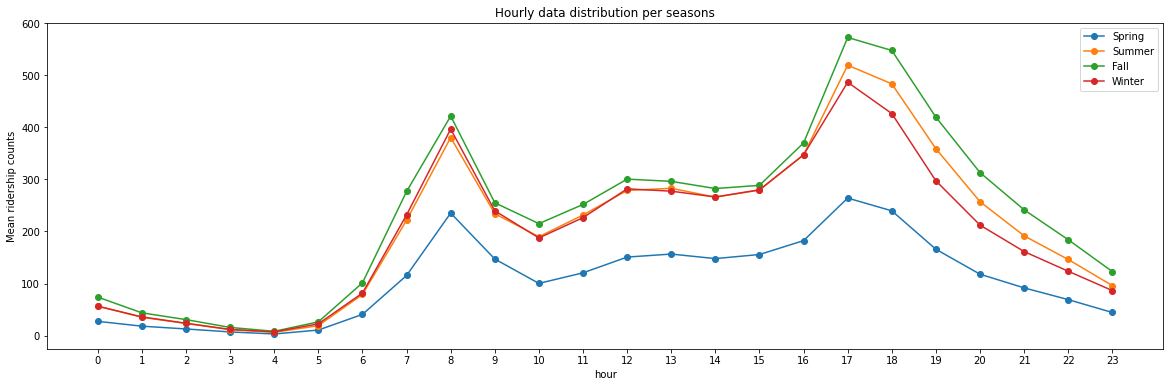

In [4]:
grouped_season_hours = hour_df[["cnt", "hr", "season"]].groupby(["season", "hr"]).agg({"cnt" : "mean"})
grouped_season_hours.columns = ['mean_count_hour']
grouped_season_hours= grouped_season_hours.reset_index()

plt.rcParams['figure.figsize']= (20,6)
x = range(24)
for i in range(4):
    y = grouped_season_hours.iloc[i*24: (i+1)*24].mean_count_hour.to_list()
    plt.plot(x,y, 'o-')

plt.xticks(x)
plt.legend(["Spring", "Summer", "Fall", "Winter"])
plt.title('Hourly data distribution per seasons')
plt.xlabel("hour")
plt.ylabel("Mean ridership counts")

plt.show()

1.4. On the same figure, plot the mean number of riders (y-axis) per hours (x-axis) for the seven days of the week. Note that weekday 0 is Sunday, 1 is Monday and 6 is Saturday. What can you conclude? 

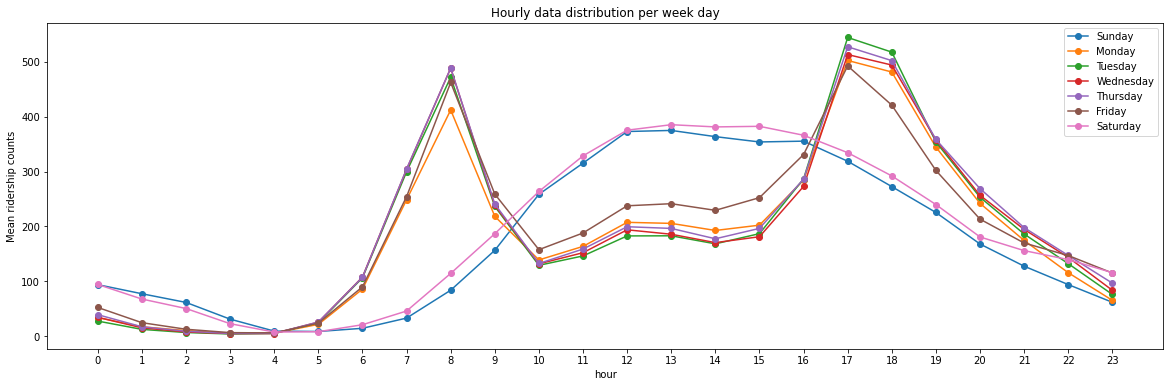

In [5]:
grouped_weekday_hours = hour_df[["cnt", "hr", "weekday"]].groupby(["weekday", "hr"]).agg({"cnt" : "mean"})
grouped_weekday_hours.columns = ['mean_count_hour']
grouped_weekday_hours= grouped_weekday_hours.reset_index()

x = range(24)
for i in range(7):
    y = grouped_weekday_hours.iloc[i*24:(i+1)*24].mean_count_hour.to_list()
    plt.plot(x,y, 'o-')

plt.xticks(x)
plt.legend(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.title('Hourly data distribution per week day')
plt.xlabel("hour")
plt.ylabel("Mean ridership counts")
plt.rcParams['figure.figsize']= (20,6)

1.5. Use a bar plot to show the monthly ridership trends, i.e. the x-axis will be the months and the y-axis will be the mean number of riders. Note that mnth 1 is January whereas 12 is December. What can you conclude? 

Text(0, 0.5, 'Mean ridership counts')

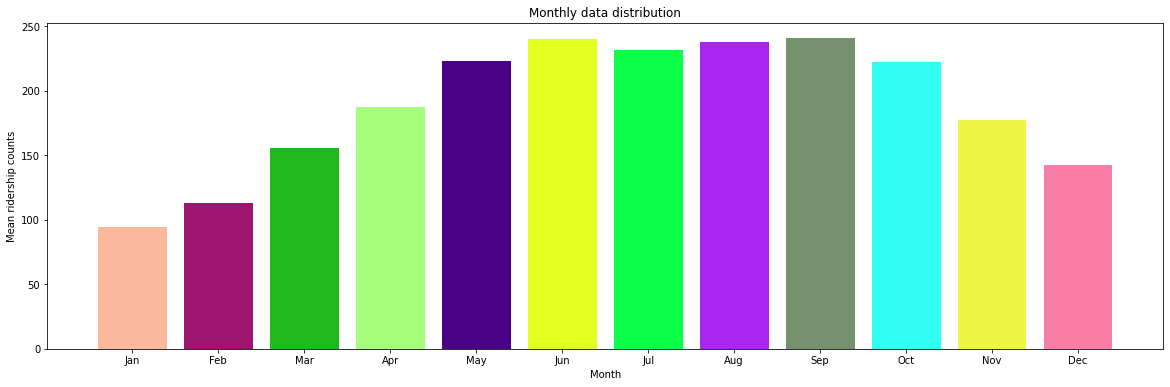

In [6]:
grouped_mnth = hour_df[["cnt", "mnth"]].groupby(["mnth"]).agg({"cnt" : "mean"})
grouped_mnth.columns = ['mean_count_month']
grouped_mnth= grouped_mnth.reset_index()

plt.bar(range(12), grouped_mnth.mean_count_month, color = [np.random.rand(3,) for i in range(12)])
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title('Monthly data distribution')
plt.xlabel("Month")
plt.ylabel("Mean ridership counts")


1.6. Use a violin plot to look at the distribution at year level. The violin plots can provide useful statistics such as the inter-qartile range or the mean/median. Note that yr 0 represents 2011 and 1 represents 2012. What can you conclude? 

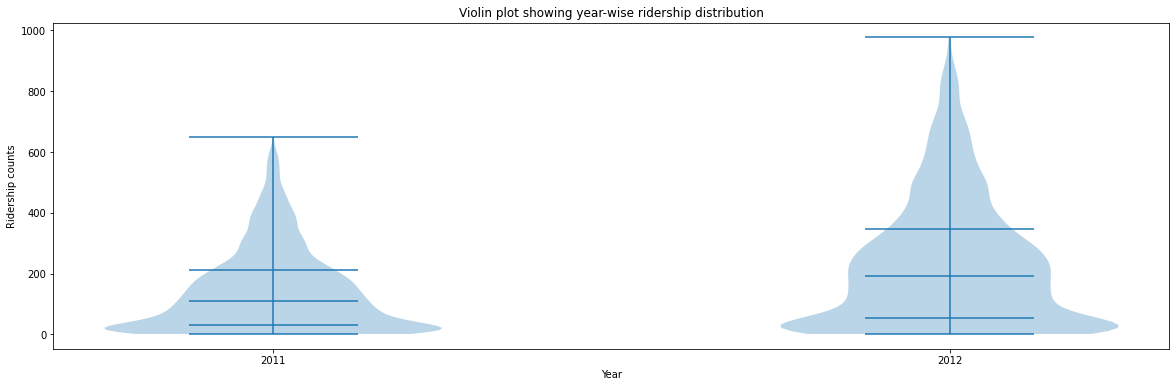

In [7]:
count2011_2012 = [sorted(hour_df[ hour_df.yr == i].cnt.to_list()) for i in range(2)]

plt.violinplot(count2011_2012, quantiles=[[0.25, 0.5, 0.75], [0.25, 0.5, 0.75]])
plt.xticks(ticks=[1,2], labels=["2011", "2012"])

plt.title('Violin plot showing year-wise ridership distribution')
plt.xlabel("Year")
plt.ylabel("Ridership counts")
plt.show()

1.7. When working with a new dataset, it is very important to check for the presence of outliers (values that are extreme and very unlikely to occur in real life) as they can affect latter steps of our machine learning framework such as modelling or training. 

- Identify all the components of a boxplot.
- Create boxplots to check for outliers in the data for the following numeric attributes: `temp, cnt, windspeed, casual` and `registered`. 

What can you say? 

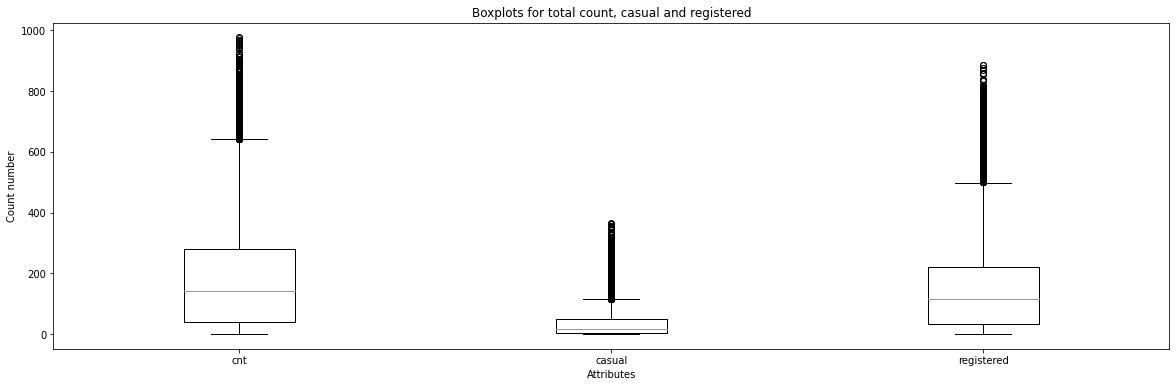

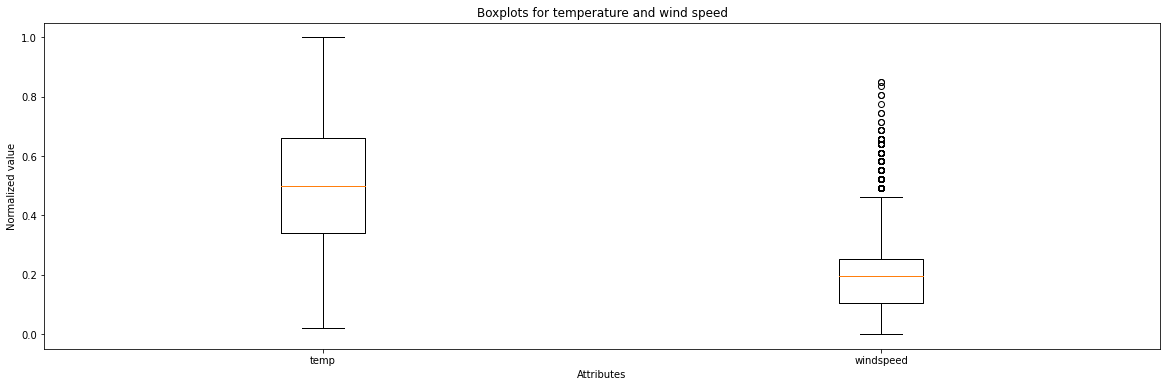

In [8]:
plt.boxplot(hour_df[["cnt", "casual", "registered"]])
plt.xticks(ticks=[1,2,3],labels=["cnt", "casual", "registered"])
plt.title('Boxplots for total count, casual and registered')
plt.xlabel("Attributes")
plt.ylabel("Count number")
plt.show()

plt.boxplot(hour_df[["temp", "windspeed"]])
plt.xticks(ticks=[1,2],labels=["temp", "windspeed"])
plt.title('Boxplots for temperature and wind speed')
plt.xlabel("Attributes")
plt.ylabel("Normalized value")
plt.show()


1.8. We now check outliers at the hour level. In the same figure, plot a box plot for each hour (x-axis) with respect to cnt (y-label). What can you conclude?

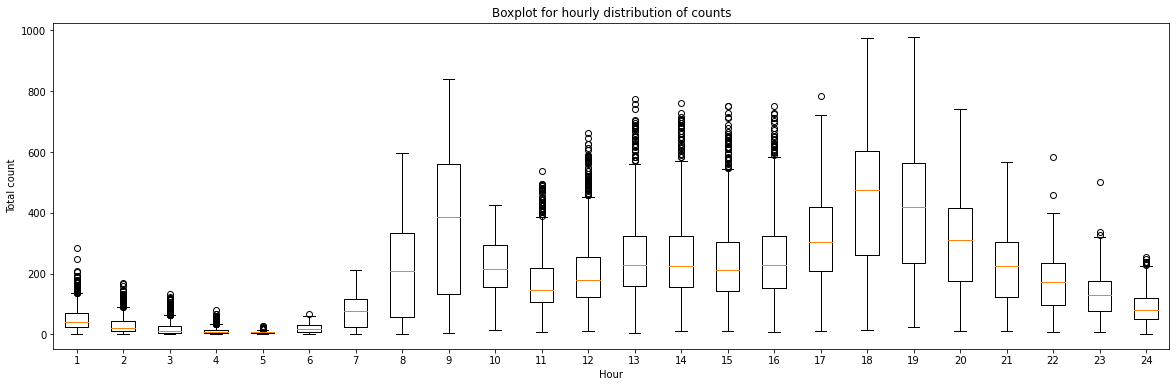

In [9]:
plt.boxplot([hour_df[hour_df.hr == i].cnt for i in range(24)])
plt.title('Boxplot for hourly distribution of counts')
plt.xlabel("Hour")
plt.ylabel("Total count")
plt.show()

1.9. Using a correlation matrix, check the correlation between the following attributes of the data: `cnt, temp, atemp, hum, windspeed, casual` and `registered`. You can use the Pandas function `corr()` to obtain the correlation matrix. Then, use the values to color a Seaborn’s `heatmap`. What can you conclude? 

<AxesSubplot:>

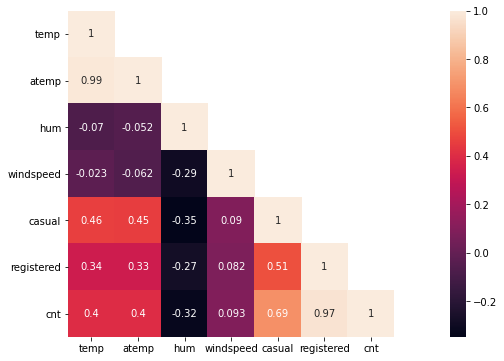

In [10]:
corrMatt = hour_df[["temp","atemp", "hum","windspeed","casual","registered", "cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=1, square=True,annot=True)

## Task 2: Regression Analysis for Predicting Bike Demands

All regression modelling techniques involve a regression function $f$ such that $Y = f(X,\beta)$, where $X$ is a set of independent variables, $Y$ is the target variable and $\beta$ are some unknown parameters. Some of the general assumptions of regression techniques are that the training dataset needs to be representative of the population, the variables in $X$ should not be linearly dependent and the variance of error should be consistent across the sample.

2.1. Using your own words, explain what is linear regression, logistic regression and polynomial regression. Highlight the differences between each technique.

%% WRITE ANSWER HERE %%

2.2. Since we want to predict bike demand, the target variable is cnt. The attributes casual and registered will be ignored in the rest of this tutorial as the sum of casual users and registered users is equal to the total count. Explain why the attributes instant, dteday and atemp should also not be used.



%% WRITE ANSWER HERE %%

2.3. Use one hot encoding to transform the attributes season and weathersit. Concatenate the one hot features with the other attributes. You should obtain a total of 17 features (`temp, hum, windspeed, hr, weekday, mnth, yr, holiday, workingday, season_1, season_2, season_3, season_4,weathersit_1, weathersit_2, weathersit_3, weathersit_4`).

In [11]:
target = hour_df.iloc[:,-1]
features_df = hour_df[['temp','hum','windspeed','hr','weekday','mnth','yr', 'holiday', 'workingday']]
for i in ['season', 'weathersit']:
    features_df = pd.concat([features_df,pd.get_dummies(hour_df[i], prefix= i)], axis=1)


2.4. Split the dataset into a training and a test dataset of size 67% and 33% respectively. Predict on the training dataset using a linear regression model (from scikit-learn’s linear_model module) and the cross_val_predict function (10 fold) from scikit-learn’s model_selection module to avoid overfitting.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.33, random_state=42)
lin_reg = linear_model.LinearRegression()
predicted = cross_val_predict(lin_reg, X_train, y_train, cv=10)

2.5. The residual $e_i$ is the difference between the observed and the predicted output of the regression function, i.e. $e_i=y_i - f(x_i,\beta)$. A regression model that has nicely fit the data will have its residuals display randomness. Use a scatter plot where the y-axis is the residual and the x-axis is the observed value. What can you say? 

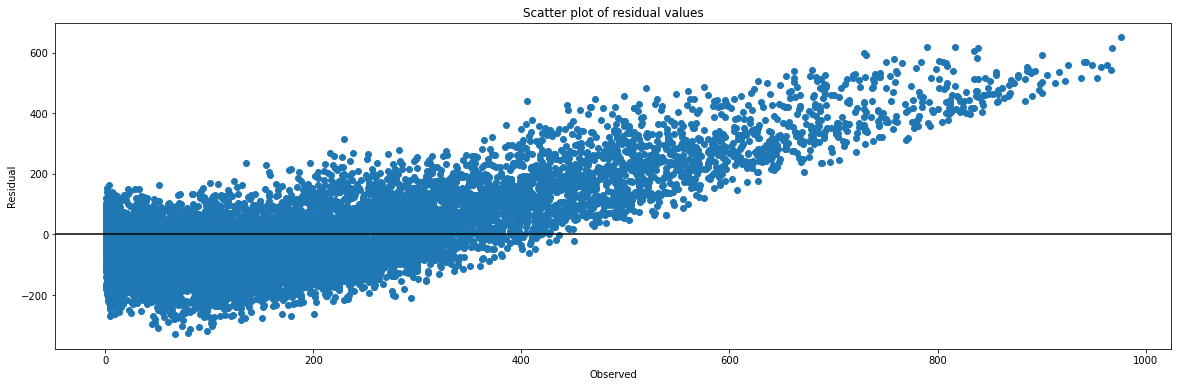

In [13]:
residual = y_train - predicted

plt.scatter(y_train, residual)
plt.axhline(0, xmin = 0, xmax = 1, c = "black")
plt.title('Scatter plot of residual values')
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.show()

2.6. The R-Squared is another measure used to check for goodness of fit when using regression techniques. It determines if the regression line is able to indicate the variance in dependent/target variable. The R-squared score has a value between 0 and 1, were 1 means that the independent variables can completely explain the variance of the dependent variable. Use cross_val_score (from scikit-learn’s model_selection module) to obtain the R-squared score of each iteration and represent them in line plot where the x-axis is the iteration number and the y-axis is the R-squared score. What can you conclude? 

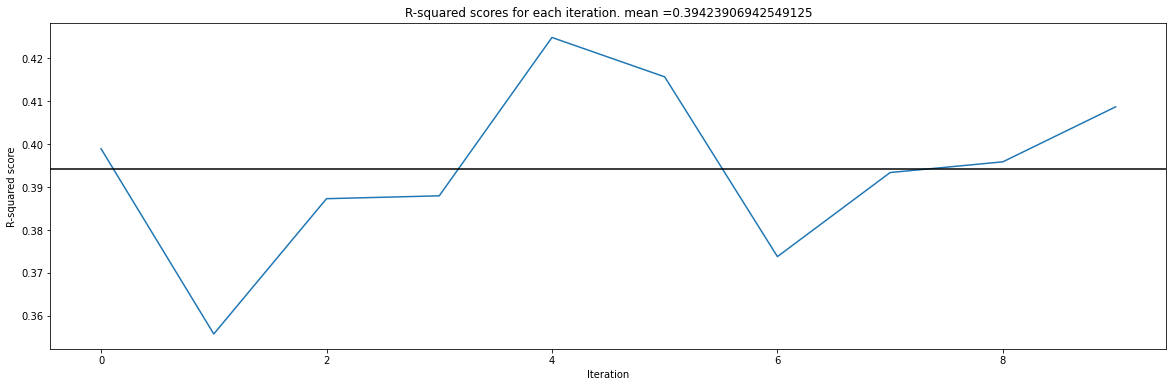

In [14]:
R2 = cross_val_score(lin_reg, X_train, y_train, cv=10)

plt.plot(range(10), R2)
plt.axhline(R2.mean(), xmin=0, xmax = 1, c = "black")
plt.title('R-squared scores for each iteration. mean ={}'.format(R2.mean()))
plt.xlabel("Iteration")
plt.ylabel("R-squared score")
plt.show()

2.7. Train your linear regression model on the training data and predict on the test data. Plot the residual using the scatter plot of question 2.5. Do you get a similar result?

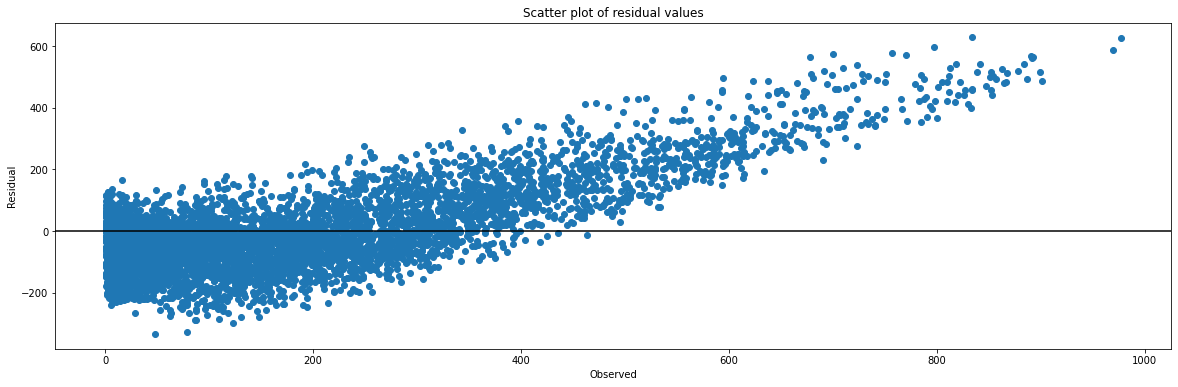

In [15]:
lin_reg.fit(X_train, y_train)
predicted_test = lin_reg.predict(X_test)
residual = y_test - predicted_test

plt.scatter(y_test, residual)
plt.axhline(0, xmin = 0, xmax = 1, c = "black")
plt.title('Scatter plot of residual values')
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.show()

## Task 3: Decision Tree Based Regression for Predicting Bike Demands

Decision trees are supervised learning algorithms used for both regression and classification problems. They are simple yet powerful in modeling non-linear relationships. They work by splitting the data points with different attributes using a cost function. The hyperparameters are learned by our learning algorithm over the course of training process and will help in avoiding undesirable behaviour like overfitting.

3.1. Create a DecisionTreeRegressor from Scikit-learn’s tree module with the parameters `max_depth=4, min_samples_split = 5, max_leaf_nodes = 10`. Fit it on the training data and print its score using the score method. Write a sentence explaining the result.

In [16]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split = 5, max_leaf_nodes = 10)
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)

0.5645919317952333

3.2. Use the export_graphviz function from Scikit-learn’s tree module to convert your regressor to dot format. Then use the function graph_from_dot_data from pydotplus to draw the graph. You can use Image from IPython’s display module to display the graph’s png (obtained with the method create_png). Using the graphical representation, what would be the prediction of the bike demands if it is 6:00am?

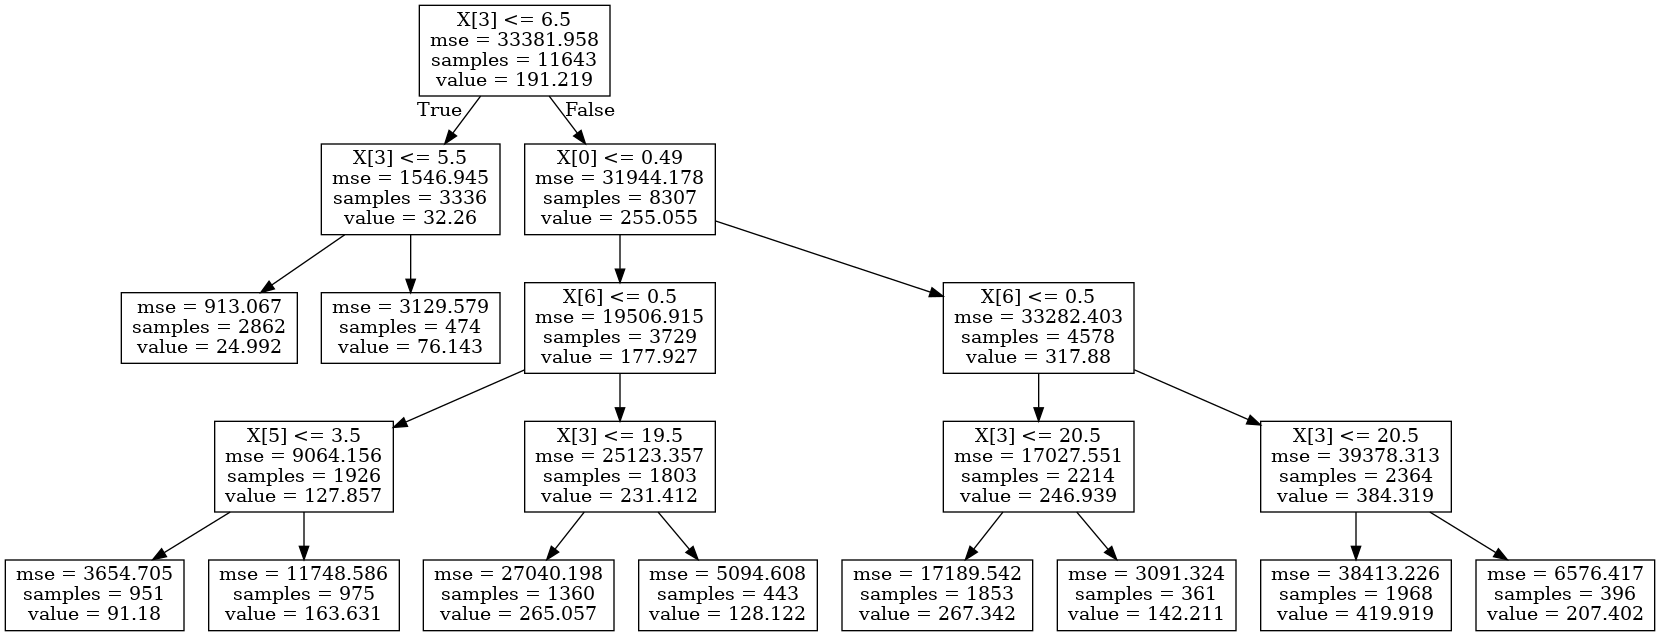

In [17]:
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())
#graph.write_pdf("./bikeshare.pdf")

3.3. Create a 5-fold `GridSearchCV` from Scikit-learn’s `model_selection` module to select the best hyperparameters for our decision tree regressor. Vary the following parameters:

* The cost function (`criterion`). Mean Squared Error (`mse`) or Mean Absolute Error (`mae`)
* The `min_samples_split` between 10, 20 and 40
* The `max_depth`  between 2, 6 and 8
* The `min_samples_leaf` between 20, 40 and 100
* The `max_leaf_nodes` between 5, 20, 100, 500 and 800.


Fit the training dataset and print the R-squared score achieved by the best regressor (`best_score_`) and the best hyperparameters (`best_params_`). __This process can take several minutes to finish.__


In [18]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800]}


grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)
grid_cv_dtr.fit(X_train, y_train)

print("Best R-squared score: {}".format(grid_cv_dtr.best_score_))
print(grid_cv_dtr.best_params_)

Best R-squared score: 0.8333284746008405
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 10}


3.4. Using the results from the cross validation (`cv_results_`), use a lines plot to highlight the effect of the `max_depth` parameter (x-axis) on the `mean_test_score` (y-axis) for the different values of `max_leaf_nodes`. What can you say? 

Text(0, 0.5, 'Average test score')

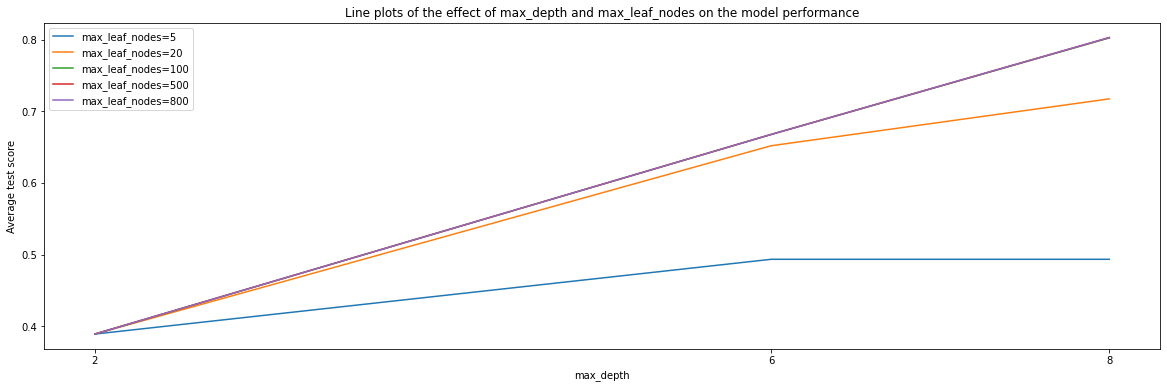

In [19]:
dtr_cv_results = pd.DataFrame(grid_cv_dtr.cv_results_)
restricted_res = dtr_cv_results[["param_max_depth", "mean_test_score", "param_max_leaf_nodes" ]]

max_leaf_nodes_values = dtr_cv_results.param_max_leaf_nodes.unique()


for i in max_leaf_nodes_values:
    plt.plot([2,6,8], restricted_res[ restricted_res.param_max_leaf_nodes == i].groupby(["param_max_depth"]).mean())
    
plt.legend(["max_leaf_nodes={}".format(i) for i in max_leaf_nodes_values])
plt.xticks([2,6,8])
plt.title('Line plots of the effect of max_depth and max_leaf_nodes on the model performance')
plt.xlabel("max_depth")
plt.ylabel("Average test score")
plt.show()

3.5. Use the best decision tree regressor to predict on the test data. Print the R-squared score and plot the residual using the scatter plot of question 2.5. What can you conclude?

Text(0, 0.5, 'Residual')

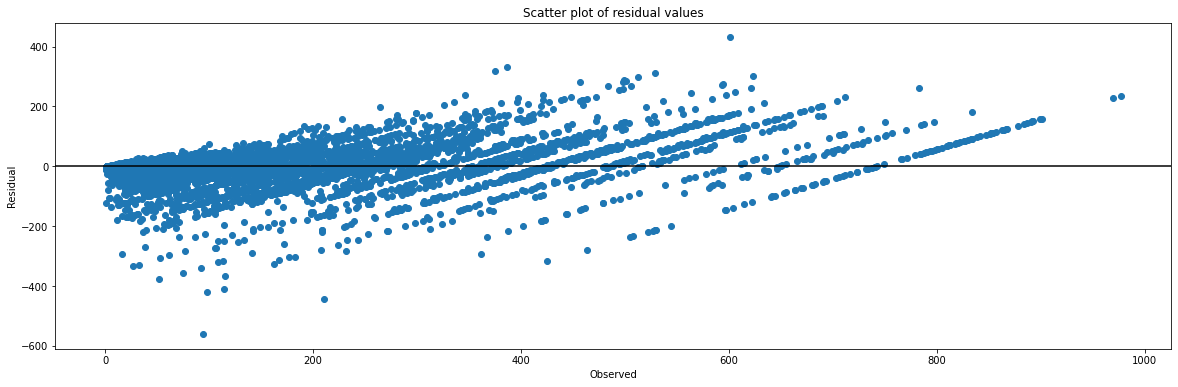

In [20]:
best_dtr = grid_cv_dtr.best_estimator_
predicted = best_dtr.predict(X_test)
residual = y_test - predicted

plt.scatter(y_test, residual)
plt.axhline(0, xmin = 0, xmax = 1, c = "black")
plt.title('Scatter plot of residual values')
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.show()